In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("ticks")

In [75]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
rename_cols = {"Annual Income (k$)": "Income",
               "Spending Score (1-100)": "SpendingScore"}
df = df.rename(columns=rename_cols)

In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object

# EDA

In [7]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


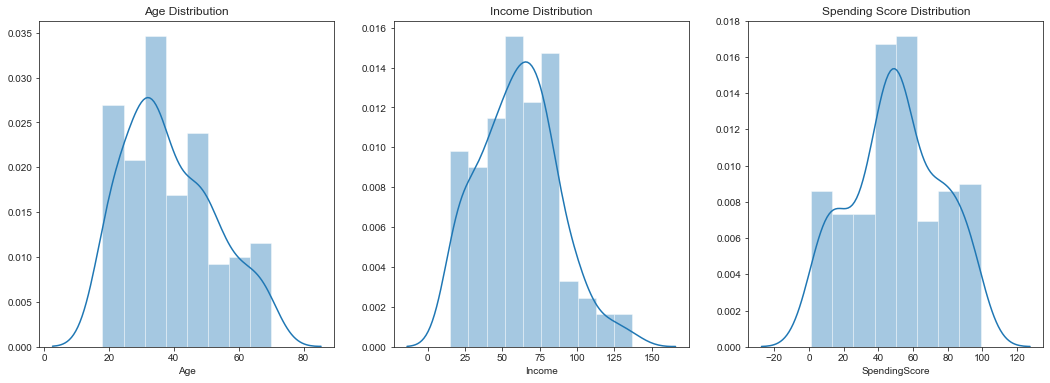

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.distplot(df["Age"],ax=ax[0])
ax[0].set_title("Age Distribution")

sns.distplot(df["Income"], ax=ax[1])
ax[1].set_title("Income Distribution")

sns.distplot(df["SpendingScore"], ax=ax[2])
ax[2].set_title("Spending Score Distribution")
plt.show()

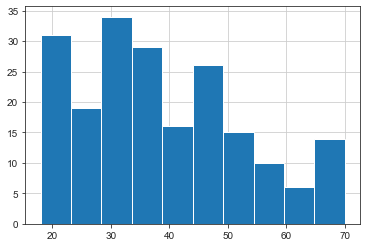

In [12]:
df["Age"].hist()

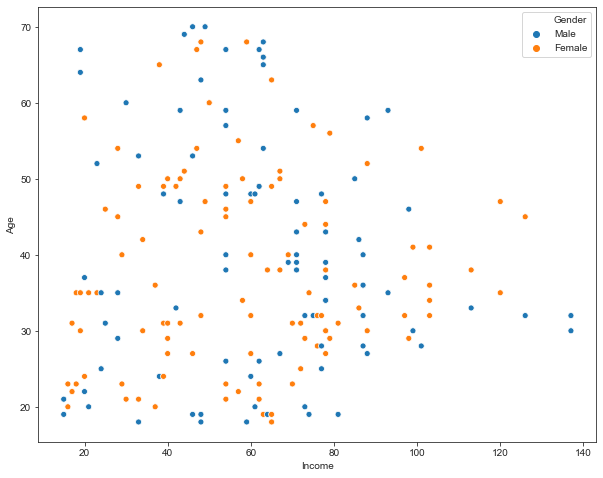

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Income", y="Age", hue="Gender");

In [15]:
def scatter_plot_2d(df, x, y, hue):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue);

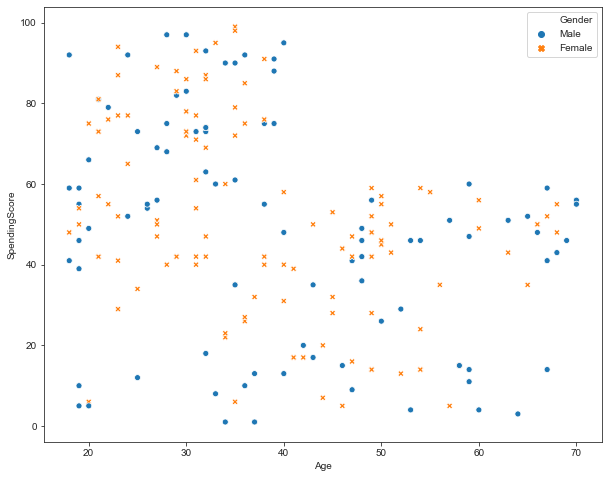

In [16]:
scatter_plot_2d(df, "Age", "SpendingScore", "Gender")

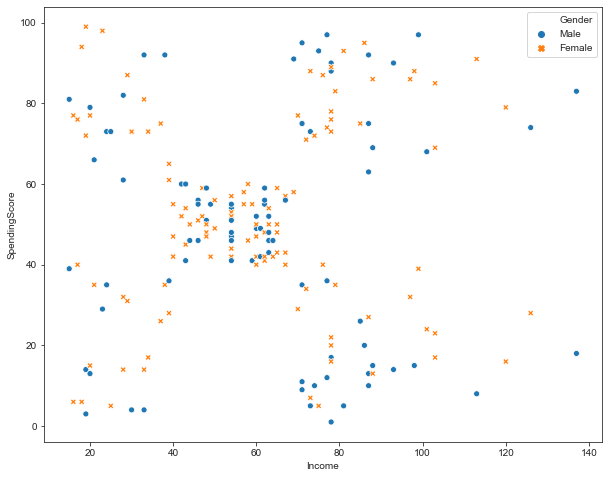

In [17]:
scatter_plot_2d(df, "Income", "SpendingScore", "Gender")

# K-Means Clustering

In [18]:
from sklearn.cluster import KMeans

In [42]:
X = df[["Age", "SpendingScore"]]
# model = KMeans(n_clusters=2, init='k-means++')
model = KMeans(n_clusters=2, init='random')
clusters = model.fit(X)

In [43]:
X.head()

,Age,SpendingScore
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [44]:
cluster_numbers = clusters.predict(X)
cluster_numbers

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [45]:
df['new'] = cluster_numbers
df['new'].value_counts()

0    115
1     85
Name: new, dtype: int64

In [46]:
df[df['new']==1].head()

,CustomerID,Gender,Age,Income,SpendingScore,new
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1


In [47]:
def scatter_plot_2d(df, x, y, hue):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue);

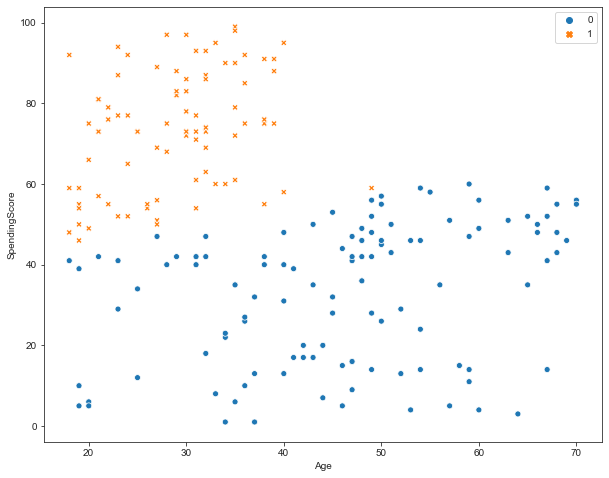

In [48]:
scatter_plot_2d(df, "Age", "SpendingScore", cluster_numbers)

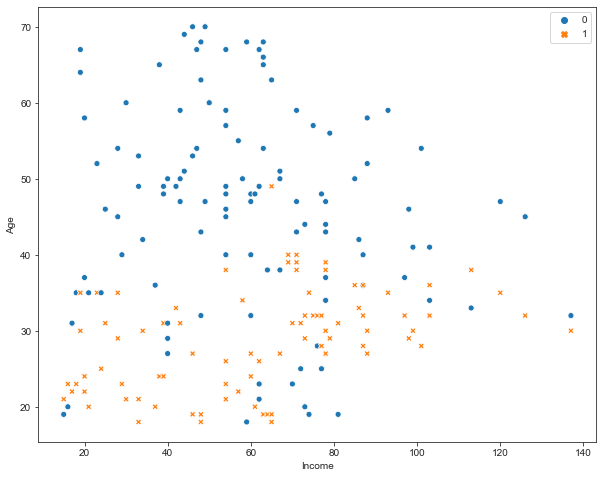

In [49]:
scatter_plot_2d(df, "Income", "Age", cluster_numbers)

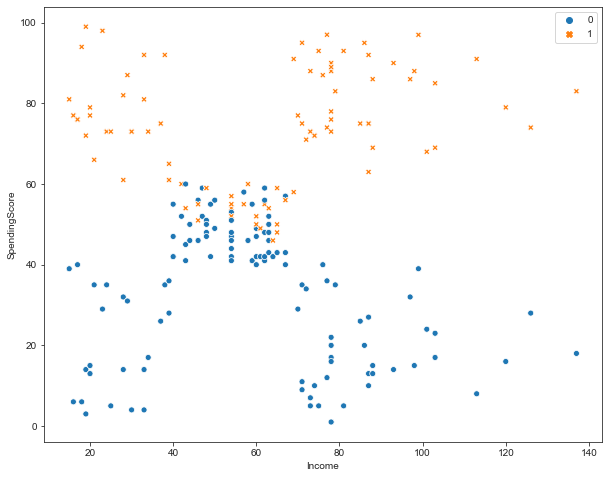

In [50]:
scatter_plot_2d(df, "Income", "SpendingScore", cluster_numbers)

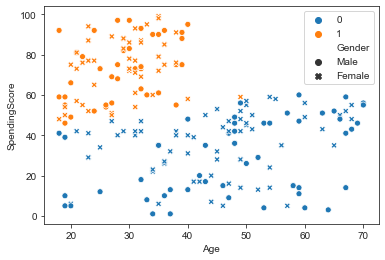

In [53]:
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue=cluster_numbers, style='Gender')
plt.show()

## Determining optimal number of clusters

Using elbow plot

In [54]:
X1 = df[["Age", "SpendingScore"]]
clusters1 = KMeans(n_clusters=2, n_init=10, init="random").fit(X1)

In [55]:
clusters1.inertia_

75949.15601023017

In [56]:
results = []
for i in range(1,10):
    X_n = df[["Age", "SpendingScore"]]
    clusters_n = KMeans(n_clusters=i, n_init=10, init="random").fit(X_n)
    results.append({"n": i, "inertia": clusters_n.inertia_})
elbow_plot = pd.DataFrame(results)

In [59]:
elbow_plot

,inertia,n
0,171535.500000,1
1,75949.156010,2
2,45840.676616,3
3,28165.583567,4
4,23839.262483,5
5,19577.258915,6
6,15514.193134,7
7,13006.483629,8
8,11631.144391,9


In [57]:
results

[{'n': 1, 'inertia': 171535.5},
 {'n': 2, 'inertia': 75949.15601023017},
 {'n': 3, 'inertia': 45840.67661610867},
 {'n': 4, 'inertia': 28165.58356662934},
 {'n': 5, 'inertia': 23839.262483341663},
 {'n': 6, 'inertia': 19577.258914820988},
 {'n': 7, 'inertia': 15514.19313435103},
 {'n': 8, 'inertia': 13006.48362885102},
 {'n': 9, 'inertia': 11631.14439105462}]

Text(0.5, 1.0, 'Optimal Number of Clusters')

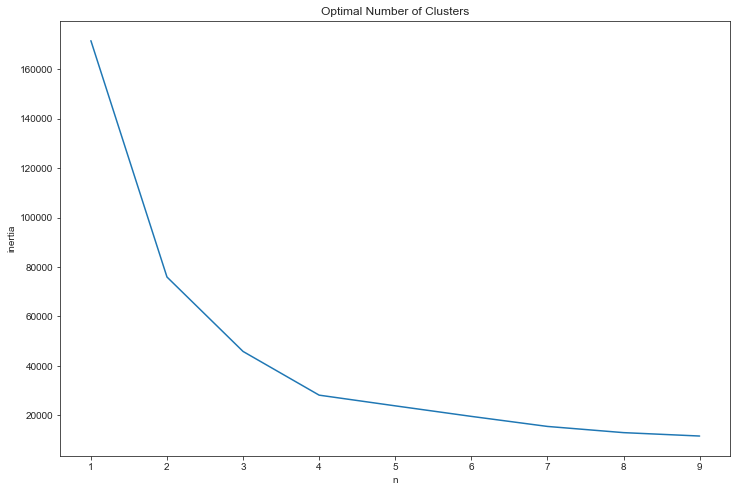

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(data=elbow_plot, x="n", y="inertia")
plt.title("Optimal Number of Clusters")

In [62]:
def plot_elbow(df, dims):
    results = []
    for i in range(1,10):
        X_n = df[dims]
        clusters_n = KMeans(n_clusters=i, n_init=10, init="random").fit(X_n)
        results.append({"n": i+1, "inertia": clusters_n.inertia_})
    elbow_plot = pd.DataFrame(results)
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data=elbow_plot, x="n", y="inertia")
    plt.title("Optimal Number of Clusters")

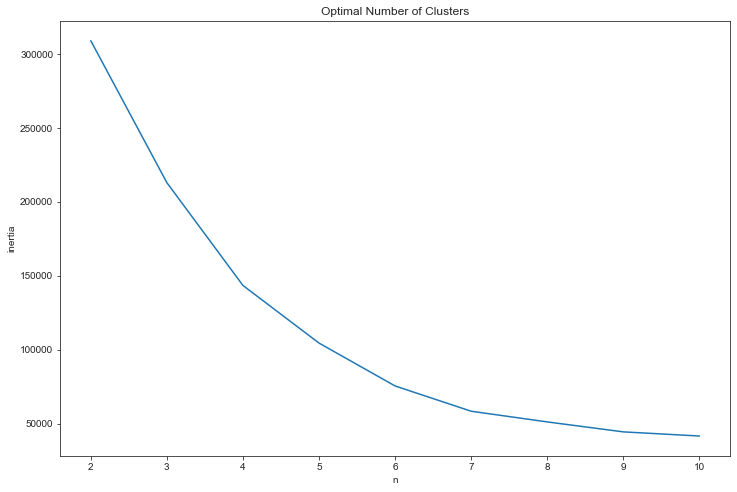

In [63]:
plot_elbow(df, ["Age", "SpendingScore", 'Income'])

In [69]:
def cluster_2d(df, x, y, n_clusters):
    X = df[[x, y]]
    clusters = KMeans(n_clusters=n_clusters, n_init=10, init="random").fit(X)
    scatter_plot_2d(df, x, y, clusters.predict(X))

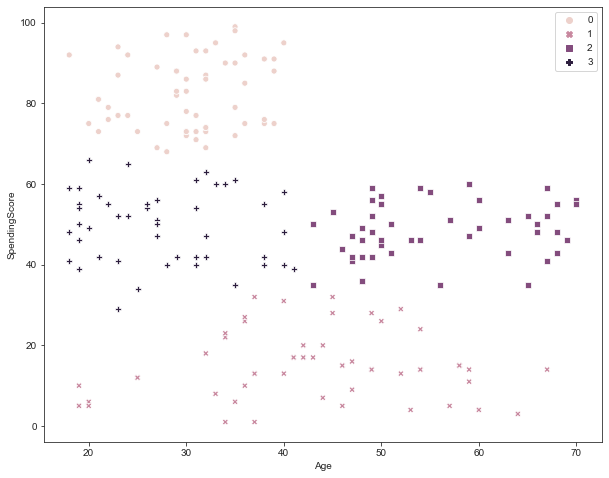

In [70]:
cluster_2d(df, "Age", "SpendingScore", 4)

In [68]:
model = KMeans(n_clusters=4, n_init=10, init="random")
clusters = model.fit(df[["Age", "SpendingScore"]])
cluster_numbers = clusters.predict(df[["Age", "SpendingScore"]])
cluster_numbers

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [80]:
X2 = df.assign(cluster=cluster_numbers)
X2 = df.drop(columns = 'CustomerID', axis=1)

In [85]:
X2.drop('Gender', axis =1,inplace=True)

In [88]:
X2.head()

,Age,Income,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
X2.drop('Gender', axis =1,inplace=True)

In [89]:
clusters = model.fit(df[["Age", "SpendingScore",'Income']])

In [90]:
import plotly
import plotly.graph_objs as go

In [91]:
scatter = go.Scatter3d(x=X2["Age"],
                     y=X2["Income"],
                     z=X2["SpendingScore"],
                     mode="markers",
                     marker={"color": clusters.predict(X2),
                             "size": 8,
                             "line": {"color": clusters.predict(X2),
                                      "width":12}});

layout = go.Layout(title="Clusters",
                   scene={"xaxis": {"title": "Age"},
                          "yaxis": {"title": "Income"},
                          "zaxis": {"title": "SpendingScore"}});

fig = go.Figure(data=scatter, layout=layout);
plotly.offline.iplot(fig)